08 - Machine Learning sobre el DataFrame 'Terminales de México'.

Objetivo: Indagar que tipo de regresión se encuentre en los datos y realizar un modelo predictivo.

IMPORTACIÓN DE LIBRERÍAS

In [1]:
# Librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import norm

# Gráficos en línea
%matplotlib inline

# Formato de número
pd.set_option("display.float_format", "{:,.2f}".format)

# Estilo de fondo
sns.set_style(style='whitegrid')

# Estilo de escala y contexto
sns.set_context(context='notebook')

# Tamaño predeterminado a figuras
plt.rcParams['figure.figsize'] =(11,9.4)

IMPORTACIÓN DEL ARCHIVO 

In [2]:
terminales_mexico_df = pd.read_csv('../data/processed/terminales_méxico_clean.csv', 
                                   index_col=0)
terminales_mexico_df.head()

,ID_Terminal,Nombre_Terminal,Tipo_Terminal,Región,Estado,Tipos_Productos_Almacenar,Año,Capacidad_Diseño_barriles,Capacidad_Operativa_barriles
0,TAR_ACG_GRO,Acapulco,Terrestre,Sur,Guerrero,Gasolina;Diésel,2015,235000,145262
1,TAR_AGS_AGS,Aguascalientes,Terrestre,Occidente,Aguascalientes,Gasolina;Diésel,2015,105000,68241
2,TAR_AÑL_CDM,Añil,Terrestre,Centro,Ciudad de México,Gasolina;Diésel,2015,235000,158343
3,TAR_AZC_CDM,Azcapotzalco,Terrestre,Centro,Ciudad de México,Gasolina;Diésel;Turbosina,2015,1510000,1107981
4,TAR_BDM_CDM,Barranca del Muerto,Terrestre,Centro,Ciudad de México,Gasolina;Diésel,2015,125000,91526


ANÁLISIS DE REGRESIÓN LINEAL

Variables a analizar

In [3]:
x_capacidad_diseño = terminales_mexico_df[['Capacidad_Diseño_barriles']]
y_capacidad_operativa = terminales_mexico_df['Capacidad_Operativa_barriles']

Datos de entrenamiento y prueba

In [4]:
x_capacidad_diseño_train, x_capacidad_diseño_test, y_capacidad_operativa_train, y_capacidad_operativa_test = (
    train_test_split(x_capacidad_diseño, y_capacidad_operativa, test_size=0.2, random_state=42)
)

Modelo

In [5]:
model = LinearRegression()
model.fit(x_capacidad_diseño_train, y_capacidad_operativa_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Predicciones

In [6]:
y_pred = model.predict(x_capacidad_diseño)

Coeficiente de Determinación y Raíz del Error Cuadrático Medio

In [11]:
# Coeficiente de Determinación
r2 = r2_score(y_capacidad_operativa_test, model.predict(x_capacidad_diseño_test))

# Raíz del Error Cuadrático Medio
rmse = np.sqrt(mean_squared_error(y_capacidad_operativa_test, model.predict(x_capacidad_diseño_test)))

print(f'R^2: {r2: .3f}')
print(f'rmse: {rmse: .0f} barriles')

R^2:  0.990
rmse:  63608 barriles


COMPROBACIÓN ENTRE VALORES REALES Y PREDICCIONES

Coeficiente de correlación

In [8]:
corr = np.corrcoef(x_capacidad_diseño.squeeze(), y_capacidad_operativa)[0,1]
print(f'Coeficiente de correlación: {corr: .3f}')

Coeficiente de correlación:  0.990


Ecuación de la recta

In [9]:
m = model.coef_[0]
b = model.intercept_

Visualización

/tmp/ipykernel_6510/4059644158.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_val = max(x_capacidad_diseño.max()[0], y_capacidad_operativa.max())


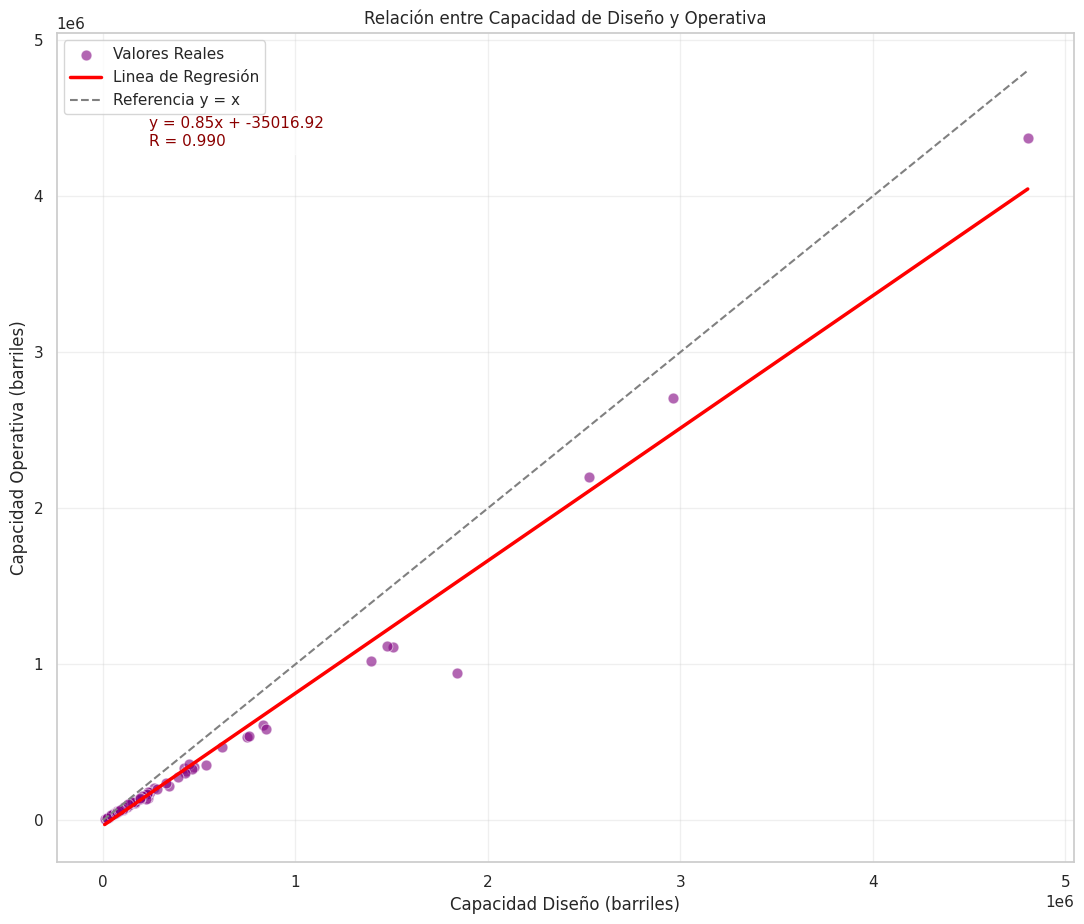

In [12]:
sns.scatterplot(
    x=x_capacidad_diseño.squeeze(),
    y=y_capacidad_operativa,
    alpha=0.6,
    s=60,
    color='purple',
    label='Valores Reales'
)

sns.lineplot(
    x=x_capacidad_diseño.squeeze(),
    y=y_pred,
    color='red',
    linewidth=2.5,
    label='Linea de Regresión',
)

max_val = max(x_capacidad_diseño.max()[0], y_capacidad_operativa.max())
plt.plot(
    [0,max_val],
    [0,max_val],
    color = 'gray',
    linestyle = 'dashed',
    label = 'Referencia y = x',
)

plt.text(
    0.05 * max_val, 0.9 * max_val,
    f"y = {m:.2f}x + {b:.2f}\nR = {corr:.3f}",
    fontsize=11, color='darkred', bbox=dict(facecolor='white', alpha=0.6)
)

plt.title(
    'Relación entre Capacidad de Diseño y Operativa'
)

plt.xlabel('Capacidad Diseño (barriles)')
plt.ylabel('Capacidad Operativa (barriles)')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.savefig('../reports/figures/05_machine_learning/01_regresión_lineal_capacidades.png',
            dpi=300, bbox_inches='tight')